In [1137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from time import time

In [1139]:
fs=125  # sampling frequency
Ts=1/fs # sampling interval
N=187 # the number of timepoints
Duration=N*Ts # duration of a signal
t=np.linspace(0, Duration-Ts, N) # array of timepoints

In [1142]:
#load 'ECG_dataX.csv' via pandas and name it X
#load 'ECG_dataY.csv' via pandas and name it Y
#each row of X is an ecg signal - only the amplitude values
#each element of Y is the class label: Y[n] is the class label of the signal X[n]
X = pd.read_csv('ECG_dataX.csv')
Y = pd.read_csv('ECG_dataY.csv')


In [1144]:
#convert the dataframe X to a numpy array
X = X.values

In [1146]:
type(X)

numpy.ndarray

In [1148]:
X.shape

(3841, 187)

In [1150]:
#convert the dataframe Y to a numpy array
Y = Y.values

In [1152]:
type(Y)

numpy.ndarray

In [1154]:
X.shape

(3841, 187)

In [1156]:
#reshape Y into a 1D array
Y = Y.reshape(-1)

In [1158]:
Y.shape

(3841,)

(array([800.,   0., 800.,   0.,   0., 800.,   0., 641.,   0., 800.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

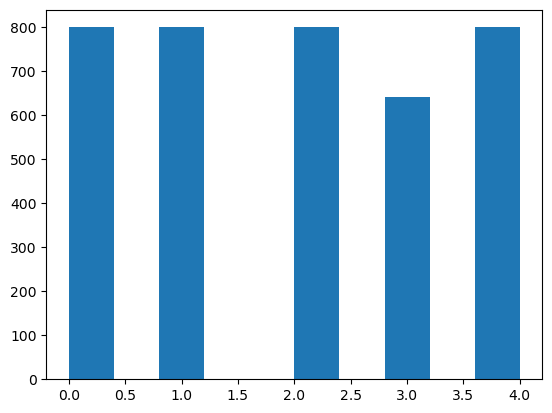

In [1160]:
#plot the histogram of Y using hist in matplotlib
fig, ax = plt.subplots()
plt.hist(Y)

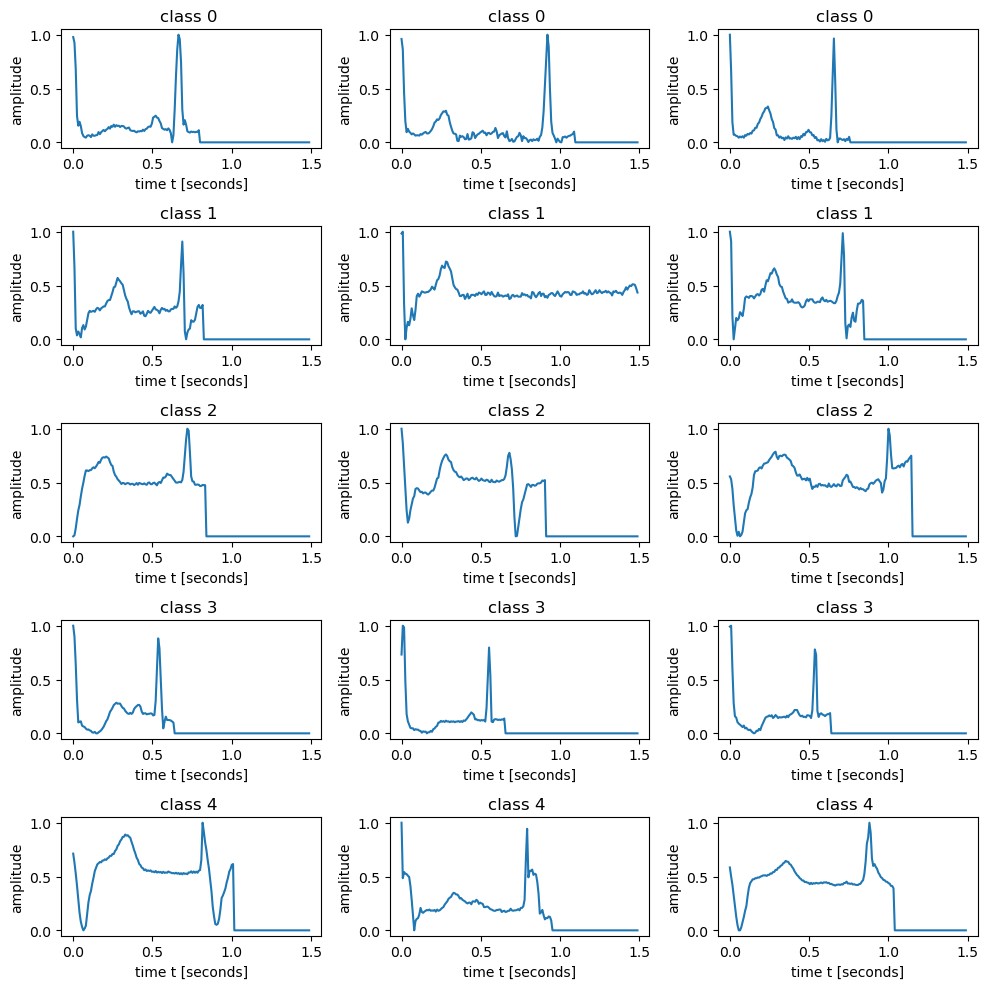

In [1163]:
#plot the first three signals in each class
fig, axes = plt.subplots(5, 3, figsize=(10, 10))  
for class_label in range(5):
    class_indices = np.where(Y == class_label)[0]
    for i in range(3):
        if i < len(class_indices):
            ax = axes[class_label, i]
            ax.plot(t, X[class_indices[i]])
            ax.set_title(f'class {class_label} ')
            ax.set_xlabel('time t [seconds]')
            ax.set_ylabel('amplitude')
plt.tight_layout()

In [1166]:
#your code to split the data using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [1168]:
X_train.shape
#3072 samples in the training set, each sample has 187 elements

(3072, 187)

In [1170]:
[X_train.min(), X_train.max()] #no need for normalization

[0.0, 1.0]

In [1172]:
Y_train.shape

(3072,)

In [1174]:
[Y_train.min(), Y_train.max()] #5 classes

[0, 4]

In [1176]:
X_test.shape
#769 samples in the training set, each sample has 187 elements

(769, 187)

In [1178]:
[X_test.min(), X_test.max()] #no need for normalization

[0.0, 1.0]

In [1180]:
Y_test.shape

(769,)

In [1182]:
[Y_test.min(), Y_test.max()] #5 classes

[0, 4]

In [1185]:
#create a list of possible values of the parameter n_neighbors, name it n_list
n_list=np.arange(1, 100, 5)

In [1187]:
n_list

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])

In [1189]:
#define param_grid that only has n_neighbors
param_grid_knn = {'n_neighbors':n_list}

In [1191]:
param_grid_knn

{'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
        86, 91, 96])}

In [1193]:
#use GridSearchCV to perform five fold cross-validation to find the optimal parameter - n_neighbors
#create a GridSearchCV object for KNeighborsClassifier in this cell
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
gs_knn = GridSearchCV(estimator=model_knn, 
                      param_grid=param_grid_knn, 
                      scoring='accuracy', 
                      cv=5)

gs_knn.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])},
             scoring='accuracy')

In [1194]:
# run/fit GridSearchCV and measure the time cost
start_time = time()
gs_knn.fit(X_train, Y_train)
end_time = time()
time_knn = end_time - start_time
print("KNeighborsClassifier: GridSearchCV time cost is", time_knn, "seconds")

KNeighborsClassifier: GridSearchCV time cost is 1.3460500240325928 seconds


In [1195]:
#show GridSearchCV results
gs_knn.cv_results_

{'mean_fit_time': array([0.00078855, 0.0007555 , 0.00056434, 0.00059094, 0.00067663,
        0.00083694, 0.00070419, 0.00073519, 0.0009378 , 0.00075855,
        0.00062141, 0.00067577, 0.00064497, 0.00066442, 0.0006495 ,
        0.0005806 , 0.00084147, 0.00065298, 0.00068645, 0.0007853 ]),
 'std_fit_time': array([1.30051476e-04, 1.80549490e-04, 8.19262579e-05, 9.14918180e-05,
        5.50791297e-05, 1.71812680e-04, 2.43057357e-04, 1.93950992e-04,
        3.16026272e-04, 2.02433554e-04, 8.67486713e-05, 3.66729627e-05,
        7.93035388e-05, 4.35280507e-05, 1.24910804e-04, 2.20706972e-04,
        1.77405892e-04, 4.50832827e-05, 4.76096054e-05, 2.61268752e-04]),
 'mean_score_time': array([0.00832653, 0.00883975, 0.00955839, 0.00986896, 0.00980983,
        0.01097727, 0.00992641, 0.01242728, 0.01290174, 0.01322107,
        0.01292543, 0.01214705, 0.01352906, 0.01679397, 0.01518393,
        0.01296859, 0.01567907, 0.01506801, 0.01581659, 0.01570668]),
 'std_score_time': array([0.00067672, 

In [1197]:
#show the best parameter
gs_knn.best_params_ 

{'n_neighbors': 1}

In [1201]:
#obtain the best model
knn_best=gs_knn.best_estimator_
knn_best

KNeighborsClassifier(n_neighbors=1)

In [1255]:
#measure the classification accuracy on the training set, using the best model
acc_train_knn=knn_best.score(X_train, Y_train)
print("KNeighborsClassifier: training accuracy is", acc_train_knn)

KNeighborsClassifier: training accuracy is 1.0


evaluate the best model on the test set (the "final exam")

In [1249]:
#measure the classification accuracy on the test set, using the best model
acc_test_knn=knn_best.score(X_test, Y_test)
print("KNeighborsClassifier: test accuracy is", acc_test_knn)

KNeighborsClassifier: test accuracy is 0.881664499349805


In [1209]:
#create a list of possible values of the parameter max_depth, name it max_depth_list
max_depth_list=np.arange(1, 101, 10)

In [1211]:
max_depth_list

array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [1213]:
#define param_grid that only has max_depth and random_state
param_grid_dt = {
    'max_depth': max_depth_list,  
    'random_state': [0]  
}

In [1215]:
param_grid_dt

{'max_depth': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]),
 'random_state': [0]}

In [1217]:
#use GridSearchCV to perform five fold cross-validation to find the optimal parameter - max_depth
#create a GridSearchCV object for DecisionTreeClassifier in this cell
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
gs_dt = GridSearchCV(estimator=model_dt,
                     param_grid=param_grid_dt, 
                     scoring='accuracy', 
                     cv=5)
gs_dt.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]),
                         'random_state': [0]},
             scoring='accuracy')

In [1219]:
#run/fit GridSearchCV and measure the time cost 
start_time = time()  
gs_dt.fit(X_train, Y_train)
end_time = time()
time_dt = end_time - start_time
print("DecisionTreeClassifier: GridSearchCV time cost is", time_dt, "seconds")

DecisionTreeClassifier: GridSearchCV time cost is 8.404054164886475 seconds


In [1220]:
#show GridSearchCV results
gs_dt.cv_results_

{'mean_fit_time': array([0.02834272, 0.15772691, 0.18161192, 0.18108096, 0.18135114,
        0.18087277, 0.18067431, 0.18069196, 0.18074679, 0.18084702]),
 'std_fit_time': array([0.00983965, 0.00227713, 0.00990336, 0.00915984, 0.00915062,
        0.00920349, 0.00910791, 0.00906197, 0.00912803, 0.00917203]),
 'mean_score_time': array([0.00039768, 0.0003427 , 0.00038867, 0.00031047, 0.0002985 ,
        0.00029502, 0.00029492, 0.00029678, 0.00029144, 0.00030055]),
 'std_score_time': array([1.33803684e-04, 8.26451929e-05, 6.14401301e-05, 6.62340373e-06,
        3.20582129e-06, 6.65456964e-06, 8.52992240e-06, 1.62736356e-05,
        1.92278339e-06, 1.58877676e-05]),
 'param_max_depth': masked_array(data=[1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_random_state': masked_array(data=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              m

In [1223]:
#show the best parameter
gs_dt.best_params_ 

{'max_depth': 11, 'random_state': 0}

In [1225]:
#obtain the best model
dt_best=gs_dt.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=11, random_state=0)

In [1259]:
#measure the classification accuracy on the training set, using the best model
acc_train_dt=dt_best.score(X_train, Y_train)
print("DecisionTreeClassifier: training accuracy is", acc_train_dt)


DecisionTreeClassifier: training accuracy is 0.9680989583333334


In [1261]:
#measure the classification accuracy on the test set, using the best model
acc_test_dt=dt_best.score(X_test, Y_test)
print("DecisionTreeClassifier: test accuracy is", acc_test_dt)

DecisionTreeClassifier: test accuracy is 0.8426527958387516


### Step 3C: Apply RandomForest (6 points)

In [1232]:
#create a list of possible values of the parameter max_depth, name it max_depth_list
max_depth_list = np.arange(1, 101, 5)

In [1234]:
max_depth_list

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])

In [1236]:
#define param_grid that only has max_depth and random_state
param_grid_rf = {
    'max_depth': max_depth_list,  
    'random_state': [0] 
}


In [1238]:
param_grid_rf

{'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
        86, 91, 96]),
 'random_state': [0]}

In [1240]:
#use GridSearchCV to perform five fold cross-validation to find the optimal parameter - max_depth
#create a GridSearchCV object for RandomForest in this cell
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
gs_rf = GridSearchCV(estimator=model_rf, 
                     param_grid=param_grid_rf, 
                     scoring='accuracy', 
                     cv=5)
gs_rf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]),
                         'random_state': [0]},
             scoring='accuracy')

In [1241]:
#run/fit GridSearchCV and measure the time cost 
start_time = time()  
gs_rf.fit(X_train, Y_train)
end_time = time()
time_rf = end_time - start_time
print("RandomForestClassifier: GridSearchCV time cost is", time_rf, "seconds")

RandomForestClassifier: GridSearchCV time cost is 397.33245182037354 seconds


In [1242]:
#show GridSearchCV results
gs_rf.cv_results_

{'mean_fit_time': array([ 0.14403234,  0.53739152,  0.75792289,  0.81505132,  0.83313103,
         0.83462696,  0.82642946,  0.82126269,  0.82050691,  0.81999078,
         0.82018542,  0.83410954,  0.82245865,  0.82083793,  0.820505  ,
         0.82159133,  0.82392468,  0.82161622,  0.81971245, 64.52170978]),
 'std_fit_time': array([1.39373848e-03, 1.15184536e-03, 1.83953453e-03, 4.80829932e-03,
        3.04895154e-02, 3.21607348e-02, 7.03469482e-03, 6.75962080e-03,
        6.12242295e-03, 6.14399611e-03, 6.28345311e-03, 3.05451345e-02,
        5.49454008e-03, 6.85436155e-03, 6.12307314e-03, 6.56278114e-03,
        6.88799579e-03, 6.63803851e-03, 2.37485204e-02, 1.27403976e+02]),
 'mean_score_time': array([0.00201068, 0.00381322, 0.00530472, 0.00576773, 0.00585194,
        0.00569901, 0.00583954, 0.00554671, 0.0058249 , 0.00573182,
        0.00573535, 0.00569005, 0.00568733, 0.00589819, 0.00561576,
        0.00571332, 0.00560036, 0.0056397 , 0.00646057, 0.00603399]),
 'std_score_time':

In [1243]:
#show the best parameter
gs_rf.best_params_ 

{'max_depth': 26, 'random_state': 0}

In [1244]:
#obtain the best model
rf_best=gs_rf.best_estimator_
rf_best

RandomForestClassifier(max_depth=26, random_state=0)

In [1265]:
#measure the classification accuracy on the training set, using the best model
acc_train_rf=rf_best.score(X_train, Y_train)
print("RandomForestClassifier: training accuracy is", acc_train_rf)


RandomForestClassifier: training accuracy is 1.0


In [1263]:
#measure the classification accuracy on the test set, using the best model
acc_test_rf=rf_best.score(X_test, Y_test)
print("RandomForestClassifier: test accuracy is", acc_test_rf)

RandomForestClassifier: test accuracy is 0.9076723016905072


In [1269]:
#make a table using pandas dataframe
#do not manually enter the numbers into the table, use variables in the above cells
df = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'Random Forest'],
    'GridSearchCV Time': [time_knn, time_dt, time_rf],
    'Training Accuracy': [acc_train_knn, acc_train_dt, acc_train_rf],
    'Test Accuracy': [acc_test_knn, acc_test_dt, acc_test_rf]
})
df

,Model,GridSearchCV Time,Training Accuracy,Test Accuracy
0,KNN,1.346050,1.000000,0.881664
1,Decision Tree,8.404054,0.968099,0.842653
2,Random Forest,397.332452,1.000000,0.907672
